# Introduction to the BDD100K Dataset

## Overview
The BDD100K (Berkeley DeepDrive 100K) dataset is one of the most comprehensive and diverse driving datasets available for computer vision research in autonomous driving. Created by UC Berkeley's DeepDrive lab, this large-scale dataset contains 100,000 videos with diverse driving scenarios captured across different locations, weather conditions, and times of day.

## Dataset Origin and Purpose
- **Development**: Created by Berkeley DeepDrive (BDD) in 2018
- **Purpose**: To advance research in autonomous driving and traffic scene understanding
- **Collection**: Collected from diverse locations in the United States (New York, San Francisco Bay Area, etc.)
- **Funding**: Supported by multiple industry partners in the autonomous vehicle space

## Dataset Structure
The BDD100K dataset is organized into several components:

### 1. Video Data
- 100,000 high-resolution (1280×720) videos
- 40 seconds per video at 30fps (approximately 1,200 frames per video)
- Total duration: ~1,100 hours of driving footage

### 2. Annotations
The dataset includes multiple annotation types across different subsets:

#### a. Image-Level Annotations (100K images)
- Weather conditions (rainy, snowy, cloudy, etc.)
- Scene type (highway, residential, parking lot, etc.)
- Time of day (daytime, night, dawn/dusk)

#### b. Object Detection (100K images)
- 2D bounding boxes for:
  - Vehicles (cars, trucks, buses)
  - Pedestrians
  - Traffic signs/lights
  - Bicycles
  - Motorcycles
  - Other road objects
- Total of over 1.8 million labeled objects

### 3. Data Splits
The dataset is divided into:
- **Training set**: 70,000 images
- **Validation set**: 10,000 images
- **Test set**: 20,000 images

## Key Features and Strengths

### 1. Diversity
- **Geographic diversity**: Captured across multiple US cities
- **Weather diversity**: Includes various weather conditions (sunny, rainy, foggy, snowy)
- **Time diversity**: Daytime, night, dawn, and dusk scenarios
- **Scene diversity**: Urban, rural, and highway environments

### 2. Comprehensive Annotations
- Multiple annotation types (detection, segmentation, tracking) in a single dataset
- High-quality manual annotations with quality control

### 3. Balanced Distribution
- Careful balancing across different conditions to prevent bias

## Dataset Statistics

| Category | Count |
|----------|-------|
| Annotated images | 100,000 |
| Labeled objects | >1.8 million |
| Weather conditions | 4 (rainy, snowy, cloudy, clear) |
| Scene types | 6 (highway, city street, etc.) |
| Time of day | 3 (day, night, dawn/dusk) |

## Potential Use Cases in Our Project
1. **Object Detection**: Training models to detect vehicles, pedestrians, and traffic signs
2. **Semantic Segmentation**: Understanding drivable areas and road layouts
3. **Behavior Prediction**: Analyzing driver behavior and traffic patterns

## Access and Usage
The dataset is available for non-commercial research purposes through the Berkeley DeepDrive website. Users must agree to the terms of use before downloading.

## References
- Original paper: "BDD100K: A Diverse Driving Dataset for Heterogeneous Multitask Learning" (Yu et al., 2020)
- Official website: https://bdd-data.berkeley.edu/
- GitHub repository: https://github.com/ucbdrive/bdd100k

This comprehensive dataset provides an excellent foundation for our project, offering rich, diverse, and well-annotated data that can help develop robust computer vision models for autonomous driving applications.

## Data Exploration: 

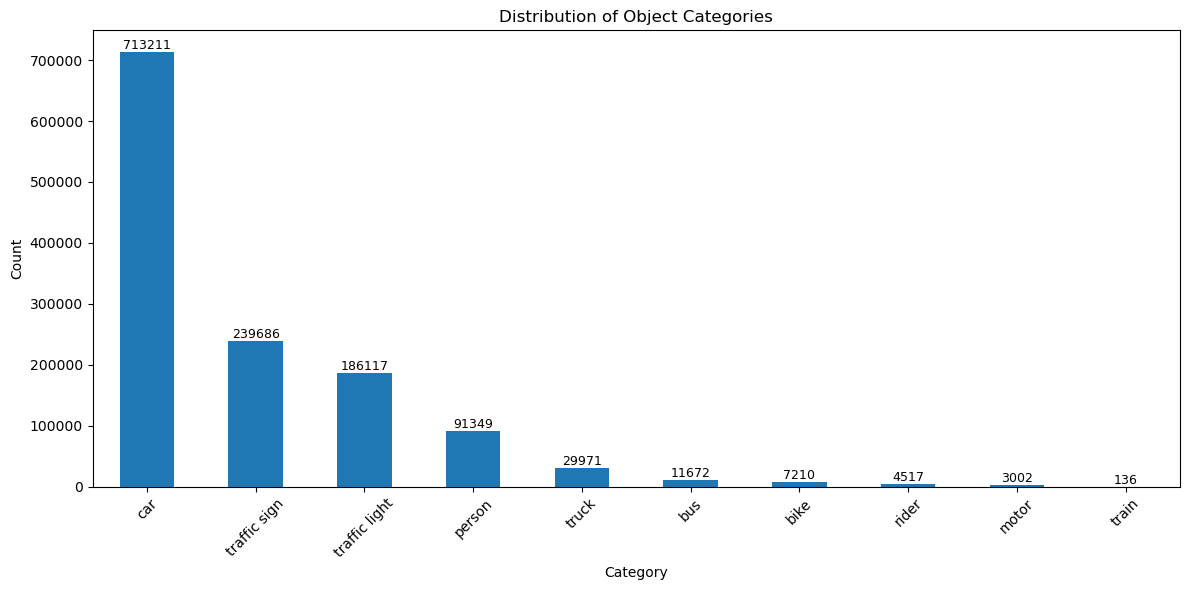

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Load the JSON annotations
with open("Data/labels/bdd100k_labels_images_train.json") as f:
    data = json.load(f)

# Prepare lists for object categories and bounding box centers
categories = []
bbox_centers = []

for entry in data:
    for label in entry["labels"]:
        category = label["category"]
        # Only consider objects with box2d annotations
        if "box2d" in label:
            box = label["box2d"]
            x_center = (box["x1"] + box["x2"]) / 2
            y_center = (box["y1"] + box["y2"]) / 2
            
            categories.append(category)
            bbox_centers.append((x_center, y_center))

# Create a DataFrame
df = pd.DataFrame(bbox_centers, columns=["x_center", "y_center"])
df["category"] = categories

# Plot 1: Distribution of object categories
plt.figure(figsize=(12, 6))
category_counts = df['category'].value_counts()
ax = category_counts.plot(kind='bar')

plt.title("Distribution of Object Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Annotate each bar with the count
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Plot 2: Spatial heatmap of object positions
#plt.figure(figsize=(10, 8))
#sns.kdeplot(
#    x=df["x_center"],
#    y=df["y_center"],
#    cmap="viridis",
#    fill=True,
#    bw_adjust=0.5
#)
#plt.title("Spatial Distribution of Object Centers (All Categories)")
#plt.xlabel("x_center")
#plt.ylabel("y_center")
#plt.gca().invert_yaxis()  # Invert Y for image-style coordinate system
#plt.tight_layout()
#plt.show()


-> Noting that there is a great bias towards certain classes like (cars, traffic lights and traffic signs) wich can be fixed by applying oversampling to the minority classes.

## Investigate the quality of the data (image resolution, label accuracy):

### Image resolution:

In [29]:
from PIL import Image
import os

def check_image_resolutions(image_dirs):
    resolutions = {}
    for dir_path in image_dirs:
        for filename in os.listdir(dir_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(dir_path, filename)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        resolutions[filename] = (width, height)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")
    return resolutions

# Example usage
image_dirs = [
    "Data/100k/test",
    "Data/100k/test/testA",
    "Data/100k/test/testB",
    "Data/100k/test/trainA"
]

resolutions = check_image_resolutions(image_dirs)

# Print resolutions
for filename, res in resolutions.items():
    print(f"{filename}: {res}")


cb2fe290-8786cd14.jpg: (1280, 720)
cb8b28d3-ab96a5fc.jpg: (1280, 720)
cbed3fd1-314723c8.jpg: (1280, 720)
cc062302-f0e81d2a.jpg: (1280, 720)
cc289a8f-2bfa8b70.jpg: (1280, 720)
cc2fa3e3-3109e987.jpg: (1280, 720)
cc596e29-57af6633.jpg: (1280, 720)
cc6ed4c9-ffb94309.jpg: (1280, 720)
cc9b85b6-23139590.jpg: (1280, 720)
ccd6bfe5-f9f0b33a.jpg: (1280, 720)
cd005e95-51793982.jpg: (1280, 720)
cd1250d6-e2a324ca.jpg: (1280, 720)
cd2dbf3d-78c22773.jpg: (1280, 720)
cd35ea13-f49ee278.jpg: (1280, 720)
cd583ed2-a1702aca.jpg: (1280, 720)
cd95a6d6-4cf11505.jpg: (1280, 720)
ce0e19f5-9aafbe6f.jpg: (1280, 720)
ce12452d-d6ea0b64.jpg: (1280, 720)
ce3d5a1d-0faa6716.jpg: (1280, 720)
ce4418ff-d3da436d.jpg: (1280, 720)
ce460681-c53bd1e1.jpg: (1280, 720)
ce480c21-65967e6b.jpg: (1280, 720)
ce53c349-27a39a23.jpg: (1280, 720)
cea99cfc-68704523.jpg: (1280, 720)
ceb45e5b-804e44c8.jpg: (1280, 720)
ced33a3e-1d3a752e.jpg: (1280, 720)
cf1038c6-f32d8e19.jpg: (1280, 720)
cf32cfc4-0820fb1e.jpg: (1280, 720)
cf32cfc4-b2cebbbf.jp

   width  height  count
0   1280     720  12891


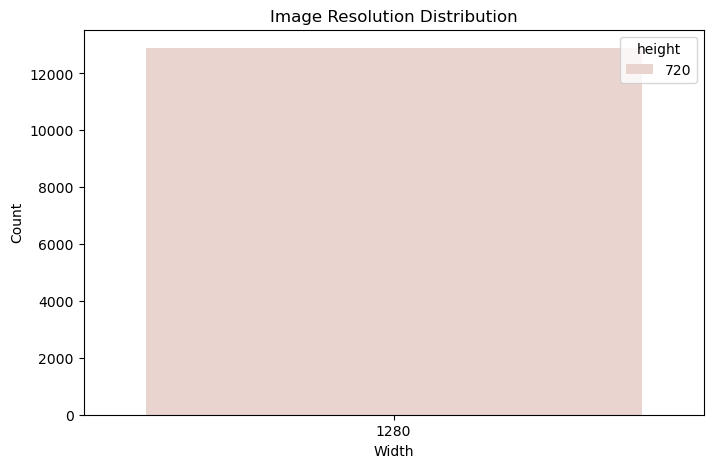

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_res = pd.DataFrame(resolutions.values(), columns=["width", "height"])
summary = df_res.value_counts().reset_index(name="count")
print(summary)

plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x="width", y="count", hue="height")
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()

### label accuracy:

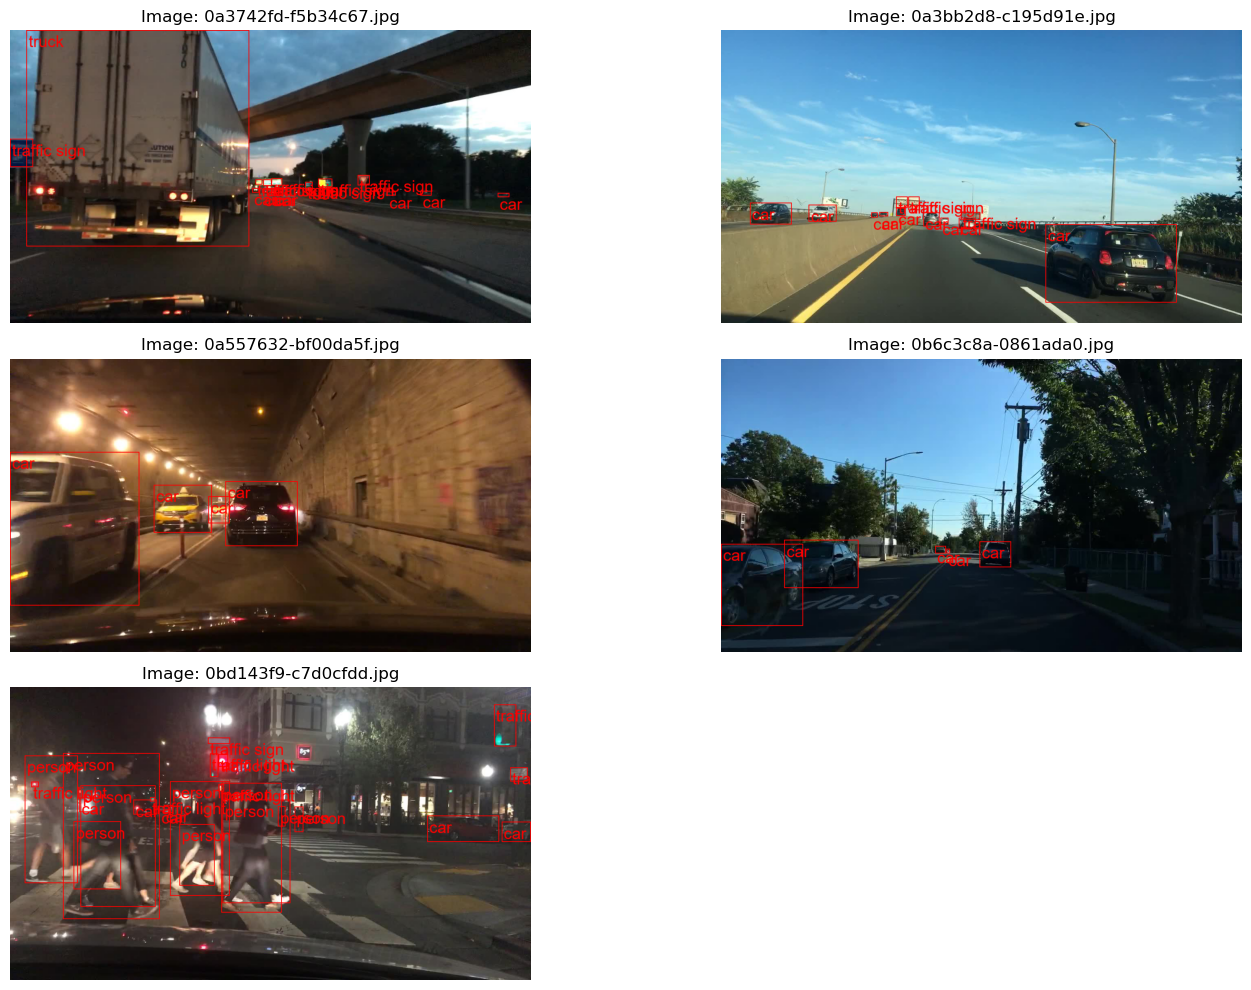

In [57]:
import os
import json
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# === CONFIG ===
json_path = 'Data/labels/bdd100k_labels_images_train.json'  # Update to your file
image_dirs = [
    "Data/100k/train",
    "Data/100k/train/testA",
    "Data/100k/train/testB",
    "Data/100k/train/trainA",
    "Data/100k/train/trainB"
]  # List of directories containing images
image_names = [  # List the exact image names you want to display
    "0a3742fd-f5b34c67.jpg",
    "0a557632-bf00da5f.jpg",
    "0b6c3c8a-0861ada0.jpg",
    "0bd143f9-c7d0cfdd.jpg",
    "0a3bb2d8-c195d91e.jpg"
]  # Specify the exact images you want to display

# === Load Labels ===
with open(json_path, 'r') as f:
    data = json.load(f)

# === Filter Data for Selected Images ===
samples = [item for item in data if item['name'] in image_names]

# === Helper function to find image in directories ===
def find_image_path(image_name, directories):
    for directory in directories:
        img_path = os.path.join(directory, image_name)
        if os.path.exists(img_path):
            return img_path
    return None  # Return None if not found in any directory

# === Visualization ===
def show_image_with_boxes(image_path, labels):
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    
    # Use a larger font size (adjust as needed)
    font = ImageFont.truetype("arial.ttf", 40)  # Example: Arial font with size 40
    
    for label in labels:
        if 'box2d' not in label:
            continue

        box = label['box2d']
        x1, y1 = box['x1'], box['y1']
        x2, y2 = box['x2'], box['y2']
        category = label['category']

        # Draw the rectangle
        draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=2)
        
        # Draw the label text on the box
        bbox = draw.textbbox((x1, y1), category, font=font)
        text_x = x1 + 5  # Padding from left side
        text_y = y1 + 5  # Padding from top side
        
        # Draw the text
        draw.text((text_x, text_y), category, fill='red', font=font)

    return image

# === Plotting ===
plt.figure(figsize=(15, (len(samples) // 2) * 5))  # Adjust height based on number of images
for idx, item in enumerate(samples):
    img_name = item['name']
    img_path = find_image_path(img_name, image_dirs)  # Search across directories

    if img_path:
        try:
            vis_img = show_image_with_boxes(img_path, item['labels'])
            plt.subplot((len(samples) + 1) // 2, 2, idx + 1)  # Two images per row
            plt.imshow(vis_img)
            plt.title(f"Image: {img_name}")
            plt.axis('off')
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
    else:
        print(f"Image file not found: {img_name}")

plt.tight_layout()
plt.show()


## Investigate Environmental Diversity:

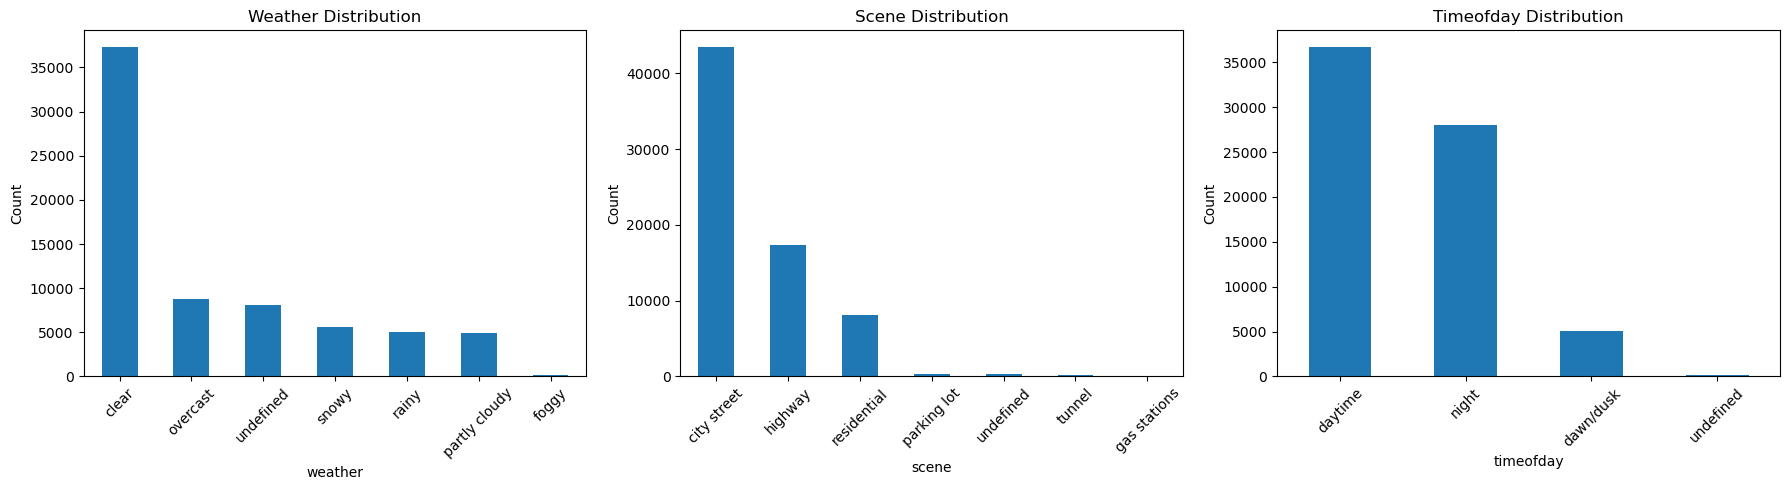

In [12]:
# Extract environmental attributes
env_data = {
    "weather": [],
    "scene": [],
    "timeofday": []
}

for entry in data:
    attributes = entry["attributes"]
    for key in env_data:
        env_data[key].append(attributes.get(key, "unknown"))

env_df = pd.DataFrame(env_data)

# Plot counts for each environmental factor
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, key in enumerate(env_data):
    env_df[key].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"{key.capitalize()} Distribution")
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


## Combine Object Categories with Environmental Context:

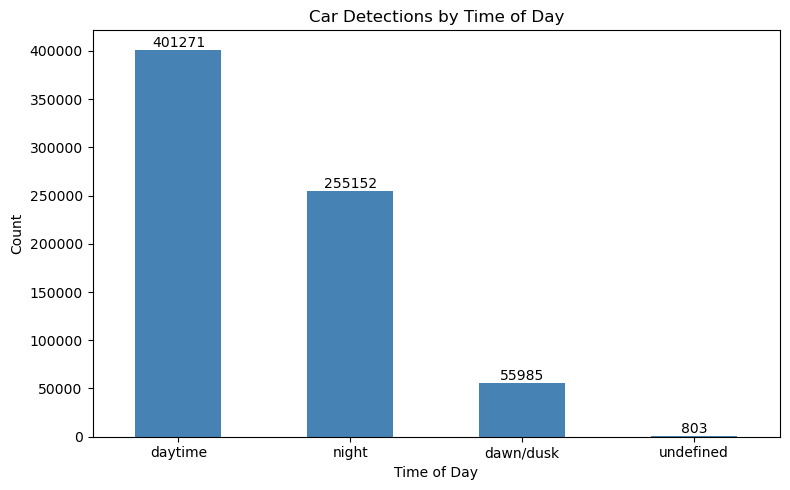

In [19]:
env_context_records = []

for entry in data:
    attributes = entry.get("attributes", {})
    weather = attributes.get("weather", "unknown")
    scene = attributes.get("scene", "unknown")
    timeofday = attributes.get("timeofday", "unknown")
    
    for label in entry["labels"]:
        if "box2d" in label:
            env_context_records.append({
                "category": label["category"],
                "weather": weather,
                "scene": scene,
                "timeofday": timeofday
            })

# Now create the DataFrame
df_env_context = pd.DataFrame(env_context_records)

# Example: Check how 'car' detections are distributed by time of day
car_env = df_env_context[df_env_context["category"] == "car"]

plt.figure(figsize=(8, 5))
ax = car_env['timeofday'].value_counts().plot(kind='bar', color='steelblue')

plt.title("Car Detections by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add count labels above bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()



## Preprocessing:

### Image resize:

In [ ]:
from PIL import Image
import numpy as np
import albumentations as A
import os

# Resize images
def resize_image(image_path, output_path, size=(416, 416)):
    img = Image.open(image_path)
    img_resized = img.resize(size)
    img_resized.save(output_path)

# Normalize pixel values
def normalize_image(image):
    return image / 255.0

# Data augmentation
def augment_image(image_path, output_path):
    transform = A.Compose([
        A.RandomCrop(width=384, height=384),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5)
    ])

    img = np.array(Image.open(image_path))
    augmented = transform(image=img)
    augmented_img = augmented['image']

    # Save augmented image
    Image.fromarray(augmented_img).save(output_path)

# Example usage
resize_image("bdd100k/images/train/image.jpg", "bdd100k/images/train/resized_image.jpg")
augment_image("bdd100k/images/train/image.jpg", "bdd100k/images/train/augmented_image.jpg")